In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diamonds_1000.csv')
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


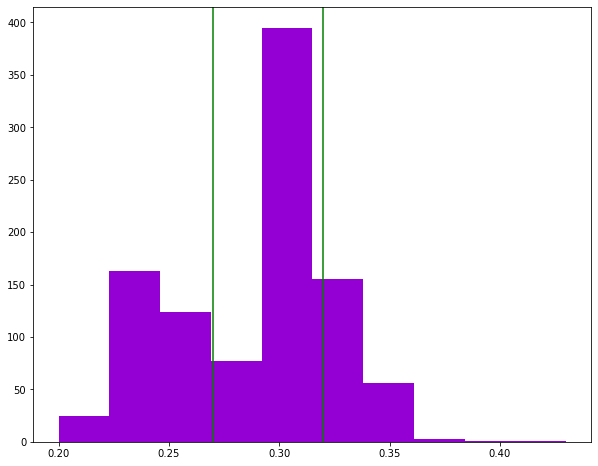

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(df['carat'], color = 'darkviolet')
plt.axvline(0.27, c='g')
plt.axvline(0.32, c='g')

In [4]:
data_cat = df.copy()
data_cat['carat_label'] = 0
data_cat.loc[data_cat['carat'] < 0.27, 'carat_label'] = 'small'
data_cat.loc[(data_cat['carat'] >= 0.27) & (data_cat['carat'] <= 0.32) , 'carat_label'] = 'medium'
data_cat.loc[data_cat['carat'] > 0.32, 'carat_label'] = 'big'

In [5]:
data_cat['carat_label'].value_counts()

medium    589
small     312
big        99
Name: carat_label, dtype: int64

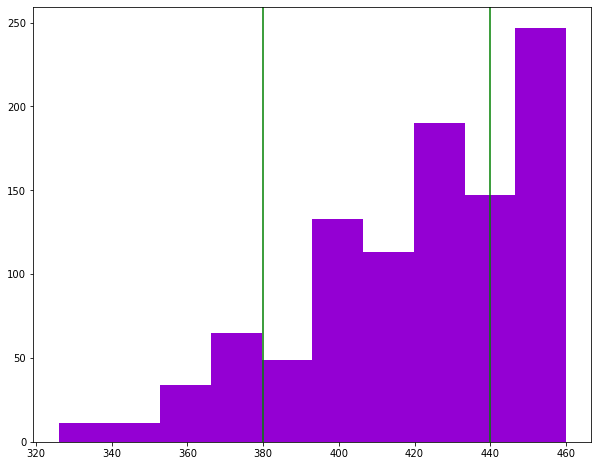

In [6]:
plt.figure(figsize=(10, 8))
plt.hist(df['price'], color = 'darkviolet')
floor = 380
ceil = 440
plt.axvline(floor, c='g')
plt.axvline(ceil, c='g')

In [7]:
data_cat['price_label'] = 0
data_cat.loc[data_cat['price'] < floor, 'price_label'] = 'cheap'
data_cat.loc[(data_cat['price'] >= floor) & (data_cat['price'] <= ceil) , 'price_label'] = 'medium'
data_cat.loc[data_cat['price'] > ceil, 'price_label'] = 'expensive'

In [9]:
data_cat['price_label'].value_counts(sort=False)

cheap        121
medium       584
expensive    295
Name: price_label, dtype: int64

In [10]:
data_cat['cut'].value_counts(sort=False)

Ideal        360
Premium      125
Good         133
Very Good    377
Fair           5
Name: cut, dtype: int64

x1 -- cut
x2 -- carat
x3 -- price

### 2.1 Таблицы сопрященности

In [11]:
crosstab_carat1 = pd.crosstab(data_cat['cut'], data_cat['carat_label'], margins = True)
crosstab_carat2 = pd.crosstab(data_cat['cut'], data_cat['carat_label'], margins = True, normalize=True)
crosstab_carat1 # матрица сопряженности

carat_label,big,medium,small,All
cut,,,,
Fair,0,2,3,5
Good,12,89,32,133
Ideal,45,235,80,360
Premium,19,70,36,125
Very Good,23,193,161,377
All,99,589,312,1000


In [12]:
crosstab_carat2

carat_label,big,medium,small,All
cut,,,,
Fair,0.000,0.002,0.003,0.005
Good,0.012,0.089,0.032,0.133
Ideal,0.045,0.235,0.080,0.360
Premium,0.019,0.070,0.036,0.125
Very Good,0.023,0.193,0.161,0.377
All,0.099,0.589,0.312,1.000


In [13]:
crosstab_price1 = pd.crosstab(data_cat['cut'], data_cat['price_label'], margins = True)
crosstab_price2 = pd.crosstab(data_cat['cut'], data_cat['price_label'], margins = True, normalize=True)
crosstab_price1 # матрица сопряженности

price_label,cheap,expensive,medium,All
cut,,,,
Fair,4,0,1,5
Good,28,29,76,133
Ideal,29,128,203,360
Premium,19,32,74,125
Very Good,41,106,230,377
All,121,295,584,1000


In [14]:
crosstab_price2

price_label,cheap,expensive,medium,All
cut,,,,
Fair,0.004,0.000,0.001,0.005
Good,0.028,0.029,0.076,0.133
Ideal,0.029,0.128,0.203,0.360
Premium,0.019,0.032,0.074,0.125
Very Good,0.041,0.106,0.230,0.377
All,0.121,0.295,0.584,1.000


### 2.2 Матрицы условных вероятностей

In [15]:
cond_prob_carat = np.divide(crosstab_carat1, np.array(crosstab_carat1[-1:]))
cond_prob_carat # матрица условных вероятностей

carat_label,big,medium,small,All
cut,,,,
Fair,0.000000,0.003396,0.009615,0.005
Good,0.121212,0.151104,0.102564,0.133
Ideal,0.454545,0.398981,0.256410,0.360
Premium,0.191919,0.118846,0.115385,0.125
Very Good,0.232323,0.327674,0.516026,0.377
All,1.000000,1.000000,1.000000,1.000


In [16]:
cond_prob_price = np.divide(crosstab_price1, np.array(crosstab_price1[-1:]))
cond_prob_price # матрица условных вероятностей

price_label,cheap,expensive,medium,All
cut,,,,
Fair,0.033058,0.000000,0.001712,0.005
Good,0.231405,0.098305,0.130137,0.133
Ideal,0.239669,0.433898,0.347603,0.360
Premium,0.157025,0.108475,0.126712,0.125
Very Good,0.338843,0.359322,0.393836,0.377
All,1.000000,1.000000,1.000000,1.000


### Чето еще 

In [17]:
c_prob = crosstab_carat2.iloc[:, -1].values[:, None] @ crosstab_carat2.iloc[-1, :].values[None, :]
c_prob # матрица распределения при условии независимости признаков

array([[4.95000e-04, 2.94500e-03, 1.56000e-03, 5.00000e-03],
       [1.31670e-02, 7.83370e-02, 4.14960e-02, 1.33000e-01],
       [3.56400e-02, 2.12040e-01, 1.12320e-01, 3.60000e-01],
       [1.23750e-02, 7.36250e-02, 3.90000e-02, 1.25000e-01],
       [3.73230e-02, 2.22053e-01, 1.17624e-01, 3.77000e-01],
       [9.90000e-02, 5.89000e-01, 3.12000e-01, 1.00000e+00]])

In [18]:
p_prob = crosstab_price2.iloc[:, -1].values[:, None] @ crosstab_price2.iloc[-1, :].values[None, :]
p_prob

array([[6.05000e-04, 1.47500e-03, 2.92000e-03, 5.00000e-03],
       [1.60930e-02, 3.92350e-02, 7.76720e-02, 1.33000e-01],
       [4.35600e-02, 1.06200e-01, 2.10240e-01, 3.60000e-01],
       [1.51250e-02, 3.68750e-02, 7.30000e-02, 1.25000e-01],
       [4.56170e-02, 1.11215e-01, 2.20168e-01, 3.77000e-01],
       [1.21000e-01, 2.95000e-01, 5.84000e-01, 1.00000e+00]])

### Коэффы Кетле 

In [19]:
c_quetle = crosstab_carat2 / c_prob - 1
c_quetle # матрица индексов Кетле

carat_label,big,medium,small,All
cut,,,,
Fair,-1.000000,-0.320883,0.923077,0.0
Good,-0.088631,0.136117,-0.228841,0.0
Ideal,0.262626,0.108281,-0.287749,0.0
Premium,0.535354,-0.049236,-0.076923,0.0
Very Good,-0.383758,-0.130838,0.368768,0.0
All,0.000000,0.000000,0.000000,0.0


In [20]:
m = crosstab_carat2.iloc[:-1, :-1] * c_quetle
np.sum(m.iloc[1:,1:].values)

0.04934923723122417

In [21]:
p_quetle = crosstab_price2 / p_prob - 1
p_quetle # матрица индексов Кетле

price_label,cheap,expensive,medium,All
cut,,,,
Fair,5.611570,-1.000000,-0.657534,0.0
Good,0.739887,-0.260864,-0.021526,0.0
Ideal,-0.334252,0.205273,-0.034437,0.0
Premium,0.256198,-0.132203,0.013699,0.0
Very Good,-0.101212,-0.046891,0.044657,0.0
All,0.000000,0.000000,0.000000,0.0


In [22]:
m = crosstab_price2.iloc[:-1, :-1] * p_quetle
np.sum(m.iloc[1:,1:].values)

0.045697353512263464

### Chi square

In [23]:
c_kxi = (crosstab_carat2  - c_prob)**2 / c_prob
c_kxi = c_kxi.iloc[:-1, :-1]
c_kxi # хи-квадрат

carat_label,big,medium,small
cut,,,
Fair,0.000495,0.000303,0.001329
Good,0.000103,0.001451,0.002173
Ideal,0.002458,0.002486,0.009300
Premium,0.003547,0.000178,0.000231
Very Good,0.005497,0.003801,0.015996


In [24]:
np.sum(c_kxi.values)

0.04934923723122414

In [25]:
p_kxi = (crosstab_price2  - p_prob)**2 / p_prob
p_kxi = p_kxi.iloc[:-1, :-1]
p_kxi # хи-квадрат

price_label,cheap,expensive,medium
cut,,,
Fair,0.019051,0.001475,0.001262
Good,0.008810,0.002670,0.000036
Ideal,0.004867,0.004475,0.000249
Premium,0.000993,0.000644,0.000014
Very Good,0.000467,0.000245,0.000439


In [26]:
np.sum(p_kxi.values)

0.04569735351226335